In [22]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [23]:
X_b = np.c_[np.ones((100, 1)), X]

In [24]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [25]:
theta_best

array([[3.85617609],
       [3.07637914]])

In [26]:
X_new = np.array([[0],[2]])

In [27]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [28]:
y_predict = X_new_b.dot(theta_best)

In [29]:
y_predict

array([[ 3.85617609],
       [10.00893436]])

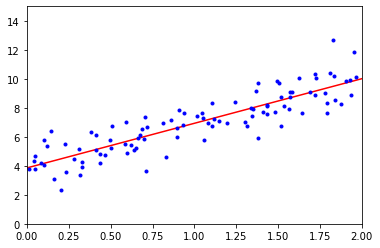

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [31]:
>>> from sklearn.linear_model import LinearRegression
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X,y)
>>> lin_reg.intercept_, lin_reg.coef_


(array([3.85617609]), array([[3.07637914]]))

In [32]:
>>> lin_reg.predict(X_new)

array([[ 3.85617609],
       [10.00893436]])

In [48]:
eta = 0.1 # 学习率
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 随机初始值
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

[[-0.3634682 ]
 [ 0.98916145]]


In [49]:
theta

array([[3.85617609],
       [3.07637914]])

In [50]:
n_epochs = 50
t0, t1 = 5, 50  #learning_schedule的超参数

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [51]:
theta

array([[3.84974491],
       [3.05232851]])

In [55]:
SGDRegressor?

In [56]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [57]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.92708373]), array([3.2426828]))